In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt


In [135]:
arff_path = "zoo.arff"


In [136]:

data, meta = arff.loadarff(arff_path)

In [137]:
# –¥–µ–∫–æ–¥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
df = pd.DataFrame(data)
for col in df.columns:
    if df[col].dtype == object:  # –µ—Å–ª–∏ –∫–æ–ª–æ–Ω–∫–∞ —Å—Ç—Ä–æ–∫–æ–≤–æ–≥–æ —Ç–∏–ø–∞
        df[col] = df[col].str.decode('utf-8')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    101 non-null    object 
 1   hair      101 non-null    object 
 2   feathers  101 non-null    object 
 3   eggs      101 non-null    object 
 4   milk      101 non-null    object 
 5   airborne  101 non-null    object 
 6   aquatic   101 non-null    object 
 7   predator  101 non-null    object 
 8   toothed   101 non-null    object 
 9   backbone  101 non-null    object 
 10  breathes  101 non-null    object 
 11  venomous  101 non-null    object 
 12  fins      101 non-null    object 
 13  legs      101 non-null    float64
 14  tail      101 non-null    object 
 15  domestic  101 non-null    object 
 16  catsize   101 non-null    object 
 17  type      101 non-null    object 
dtypes: float64(1), object(17)
memory usage: 14.3+ KB


In [139]:
df.head(15)

animal   hair feathers   eggs   milk airborne aquatic predator toothed  \
0   aardvark   true    false  false   true    false   false     true    true   
1   antelope   true    false  false   true    false   false    false    true   
2       bass  false    false   true  false    false    true     true    true   
3       bear   true    false  false   true    false   false     true    true   
4       boar   true    false  false   true    false   false     true    true   
5    buffalo   true    false  false   true    false   false    false    true   
6       calf   true    false  false   true    false   false    false    true   
7       carp  false    false   true  false    false    true    false    true   
8    catfish  false    false   true  false    false    true     true    true   
9       cavy   true    false  false   true    false   false    false    true   
10   cheetah   true    false  false   true    false   false     true    true   
11   chicken  false     true   true  false     true   false    false   false   
12      chub  false    false   true  false    false    true     true    true   
13      clam  false    false   true  false    false   false     true   false   
14      crab  false    false   true  false    false    true     true   false   

   backbone breathes venomous   fins  legs   tail domestic catsize  \
0      true     true    false  false   4.0  false    false    true   
1      true     true    false  false   4.0   true    false    true   
2      true    false    false   true   0.0   true    false   false   
3      true     true    false  false   4.0  false    false    true   
4      true     true    false  false   4.0   true    false    true   
5      true     true    false  false   4.0   true    false    true   
6      true     true    false  false   4.0   true     true    true   
7      true    false    false   true   0.0   true     true   false   
8      true    false    false   true   0.0   true    false   false   
9      true     true    false  false   4.0  false     true   false   
10     true     true    false  false   4.0   true    false    true   
11     true     true    false  false   2.0   true     true   false   
12     true    false    false   true   0.0   true    false   false   
13    false    false    false  false   0.0  false    false   false   
14    false    false    false  false   4.0  false    false   false   

            type  
0         mammal  
1         mammal  
2           fish  
3         mammal  
4         mammal  
5         mammal  
6         mammal  
7           fish  
8           fish  
9         mammal  
10        mammal  
11          bird  
12          fish  
13  invertebrate  
14  invertebrate

In [140]:
# –ü—Ä–∏–≤–µ–¥—ë–º –±—É–ª–µ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –∫ 0/1 –∏ legs –∫ int
bool_cols = ["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","tail","domestic","catsize"]
for c in bool_cols:
    df[c] = df[c].astype(str).str.strip().str.lower().map({"true":1,"false":0})
df['legs'] = pd.to_numeric(df['legs'], errors='coerce').astype('Int64')  # nullable int
df.head(20)

animal  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0   aardvark     1         0     0     1         0        0         1   
1   antelope     1         0     0     1         0        0         0   
2       bass     0         0     1     0         0        1         1   
3       bear     1         0     0     1         0        0         1   
4       boar     1         0     0     1         0        0         1   
5    buffalo     1         0     0     1         0        0         0   
6       calf     1         0     0     1         0        0         0   
7       carp     0         0     1     0         0        1         0   
8    catfish     0         0     1     0         0        1         1   
9       cavy     1         0     0     1         0        0         0   
10   cheetah     1         0     0     1         0        0         1   
11   chicken     0         1     1     0         1        0         0   
12      chub     0         0     1     0         0        1         1   
13      clam     0         0     1     0         0        0         1   
14      crab     0         0     1     0         0        1         1   
15  crayfish     0         0     1     0         0        1         1   
16      crow     0         1     1     0         1        0         1   
17      deer     1         0     0     1         0        0         0   
18   dogfish     0         0     1     0         0        1         1   
19   dolphin     0         0     0     1         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0         1         1         1         0     0     4     0         0   
1         1         1         1         0     0     4     1         0   
2         1         1         0         0     1     0     1         0   
3         1         1         1         0     0     4     0         0   
4         1         1         1         0     0     4     1         0   
5         1         1         1         0     0     4     1         0   
6         1         1         1         0     0     4     1         1   
7         1         1         0         0     1     0     1         1   
8         1         1         0         0     1     0     1         0   
9         1         1         1         0     0     4     0         1   
10        1         1         1         0     0     4     1         0   
11        0         1         1         0     0     2     1         1   
12        1         1         0         0     1     0     1         0   
13        0         0         0         0     0     0     0         0   
14        0         0         0         0     0     4     0         0   
15        0         0         0         0     0     6     0         0   
16        0         1         1         0     0     2     1         0   
17        1         1         1         0     0     4     1         0   
18        1         1         0         0     1     0     1         0   
19        1         1         1         0     1     0     1         0   

    catsize          type  
0         1        mammal  
1         1        mammal  
2         0          fish  
3         1        mammal  
4         1        mammal  
5         1        mammal  
6         1        mammal  
7         0          fish  
8         0          fish  
9         0        mammal  
10        1        mammal  
11        0          bird  
12        0          fish  
13        0  invertebrate  
14        0  invertebrate  
15        0  invertebrate  
16        0          bird  
17        1        mammal  
18        1          fish  
19        1        mammal

In [141]:
#–ø—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤
missing = df.isnull().sum()
missing

animal      0
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [142]:
# –ø—Ä–æ–≤–µ—Ä–º –¥—É–±–ª–∏–∫–∞—Ç—ã (–ø–æ–ª–Ω—ã–µ –∏ –ø–æ 'animal' —Ç–∞–∫ –∫–∞–∫ –æ–Ω –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å —É–Ω–∏–∫–∞–ª—å–Ω—ã–º)
full_dups = df.duplicated(keep=False).sum()
animal_dups = df['animal'].duplicated(keep=False).sum()
print(f"There are {full_dups} duplications in the dataset.")
print(f"There are {animal_dups} duplications in the dataset.")

There are 0 duplications in the dataset.
There are 2 duplications in the dataset.


In [143]:
if animal_dups > 0:
    duplicates = df[df['animal'].duplicated(keep=False)].sort_values('animal')
duplicates

animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
25   frog     0         0     1     0         0        1         1        1   
26   frog     0         0     1     0         0        1         1        1   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
25         1         1         0     0     4     0         0        0   
26         1         1         1     0     4     0         0        0   

         type  
25  amphibian  
26  amphibian

In [144]:
#–∏–∑ —Ç–∞–±–ª–∏—Ü—ã –≤—ã—à–µ —è–≤–Ω–æ –≤–∏–¥–Ω—ã –¥–≤–∞ –¥—É–±–ª–∏–∫–∞—Ç–∞!!

In [145]:
#–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤
type_counts = df['type'].value_counts()
type_counts

type
mammal          41
bird            20
fish            13
invertebrate    10
insect           8
reptile          5
amphibian        4
Name: count, dtype: int64

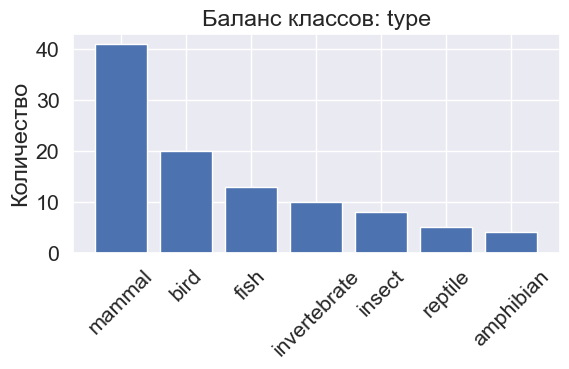

In [146]:
plt.figure(figsize = (6,4))
plt.bar(type_counts.index, type_counts.values)
plt.title('–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤: type')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [147]:
numeric_df = df.select_dtypes(include=[np.number])

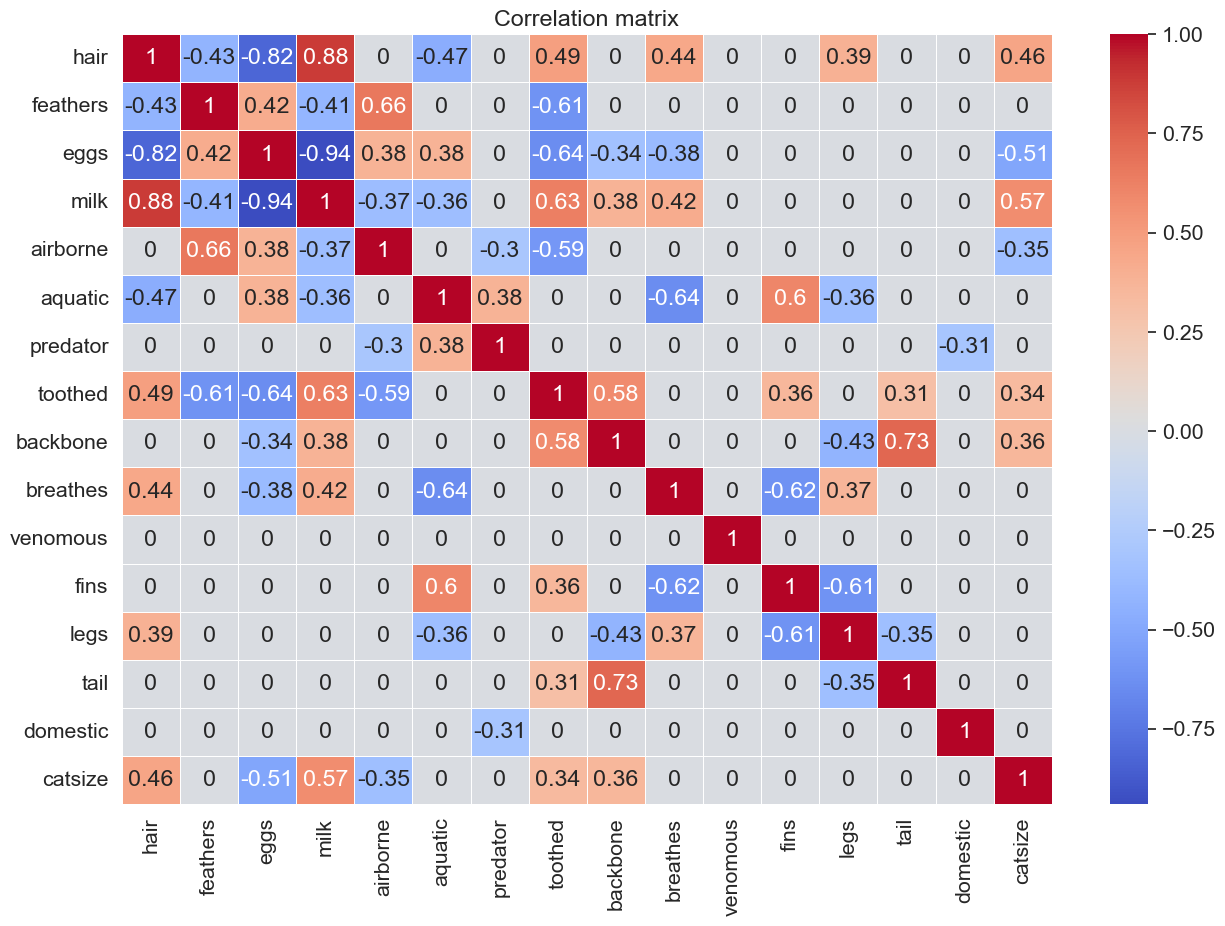

In [148]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = numeric_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [149]:
# –≠—Ç–æ –º–∞—Ç—Ä–∏—Ü–∞ –ø–æ–ø–∞—Ä–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π (–≤–µ—Ä–æ—è—Ç–Ω–æ, –ü–∏—Ä—Å–æ–Ω–∞) –º–µ–∂–¥—É –±–∏–Ω–∞—Ä–Ω—ã–º–∏/—á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∑–æ–æ–ø–∞—Ä–∫–∞: hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize. –¶–≤–µ—Ç–æ–≤–∞—è —à–∫–∞–ª–∞ —Å–ª–µ–≤–∞ ‚Äî –æ—Ç ‚àí1 (—Å–∏–ª—å–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è, —Ö–æ–ª–æ–¥–Ω—ã–π —Ü–≤–µ—Ç) –¥–æ +1 (—Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è, —Ç—ë–ø–ª—ã–π —Ü–≤–µ—Ç).


In [150]:
# 1) –Ω–∞–π—Ç–∏ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–µ –ø–∞—Ä—ã
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
#print("–ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏:", numeric_df.columns.tolist(), "\n")

In [151]:
# === 3) –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫ –º–∞—Ç—Ä–∏—Ü—ã (—á—Ç–æ–±—ã –Ω–µ –¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å –ø–∞—Ä—ã) ===
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [152]:
# === 4) –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø–æ—Ä–æ–≥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ===
threshold = 0.8  # –º–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å –Ω–∞ 0.7, 0.9 –∏ —Ç.–ø.

In [153]:
# === 5) –ù–∞—Ö–æ–¥–∏–º –≤—Å–µ –ø–∞—Ä—ã, –≥–¥–µ |corr| > threshold ===
corr_pairs = (
    upper.stack()  # –ø—Ä–µ–≤—Ä–∞—â–∞–µ—Ç –º–∞—Ç—Ä–∏—Ü—É –≤ "—Å–ø–∏—Å–æ–∫" (multi-index Series)
    .reset_index()  # –¥–µ–ª–∞–µ–º –æ–±—ã—á–Ω—ã–π DataFrame
    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0: 'Correlation'})
)

In [154]:
# –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ –ø–æ—Ä–æ–≥—É
strong_corr = corr_pairs[abs(corr_pairs['Correlation']) > threshold]


In [155]:
# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —É–±—ã–≤–∞–Ω–∏—é –ø–æ –∞–±—Å–æ–ª—é—Ç–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
strong_corr = strong_corr.reindex(strong_corr['Correlation'].abs().sort_values(ascending=False).index)

In [156]:
# === 6) –ü–µ—á–∞—Ç–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã ===
if not strong_corr.empty:
    print(f"\nüî• –°–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–µ –ø–∞—Ä—ã (|corr| > {threshold}):\n")
    print(strong_corr.to_string(index=False))
else:
    print(f"\n–ù–µ—Ç –ø–∞—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å |corr| > {threshold}")


üî• –°–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–µ –ø–∞—Ä—ã (|corr| > 0.8):

Feature_1 Feature_2  Correlation
     eggs      milk    -0.938848
     hair      milk     0.878503
     hair      eggs    -0.817382


In [157]:
# === 7) –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ: —Å–ø–∏—Å–æ–∫ –∫–æ–ª–æ–Ω–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ —É—á–∞—Å—Ç–≤—É—é—Ç –≤ —ç—Ç–∏—Ö –ø–∞—Ä–∞—Ö ===
to_drop = sorted(set(strong_corr['Feature_2']))
print(f"\nüìã –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è/–æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è (|corr| > {threshold}):\n{to_drop}")


üìã –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è/–æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è (|corr| > 0.8):
['eggs', 'milk']


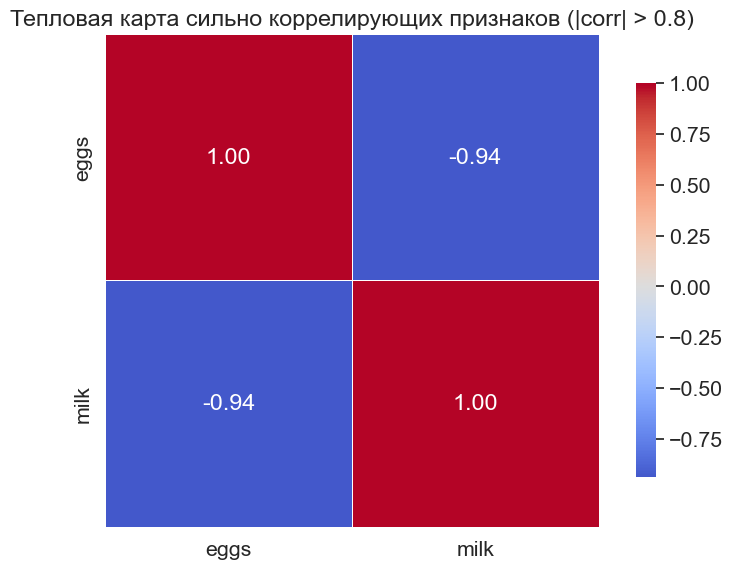

In [158]:
# === 8) –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ‚Äî —Å—Ç—Ä–æ–∏–º heatmap —Ç–æ–ª—å–∫–æ –¥–ª—è —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ===
if to_drop:
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr.loc[to_drop, to_drop],
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True,
                fmt=".2f",
                linewidths=0.5,
                cbar_kws={"shrink": .8})
    plt.title(f"–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (|corr| > {threshold})")
    plt.tight_layout()
    plt.show()
else:
    print("\n–ù–µ –Ω–∞–π–¥–µ–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è heatmap ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ, –Ω–µ—Ç —Å–∏–ª—å–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π.")

In [159]:
# === 9) –°–æ–∑–¥–∞—ë–º –æ—á–∏—â–µ–Ω–Ω—É—é –∫–æ–ø–∏—é DataFrame ===
df_clean = df.drop(columns=to_drop, errors='ignore')
print(f"\n‚úÖ –£–¥–∞–ª–µ–Ω–æ {len(to_drop)} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–æ: {df.shape}, –ø–æ—Å–ª–µ: {df_clean.shape}")


‚úÖ –£–¥–∞–ª–µ–Ω–æ 2 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–æ: (101, 18), –ø–æ—Å–ª–µ: (101, 16)


In [160]:
# === 10) –ü—Ä–æ–≤–µ—Ä–∫–∞ ‚Äî –∫–∞–∫–∏–µ –∫–æ–ª–æ–Ω–∫–∏ –æ—Å—Ç–∞–ª–∏—Å—å ===
print("\n–û—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏:\n", df_clean.columns.tolist())


–û—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏:
 ['animal', 'hair', 'feathers', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


In [163]:
# === 11) –ù–æ–≤–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏ ===
print("\nüìà –ù–æ–≤–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è —Å–∏–ª—å–Ω–æ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:\n")
corr_clean = df_clean.select_dtypes(include=[np.number]).corr()


üìà –ù–æ–≤–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è —Å–∏–ª—å–Ω–æ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:



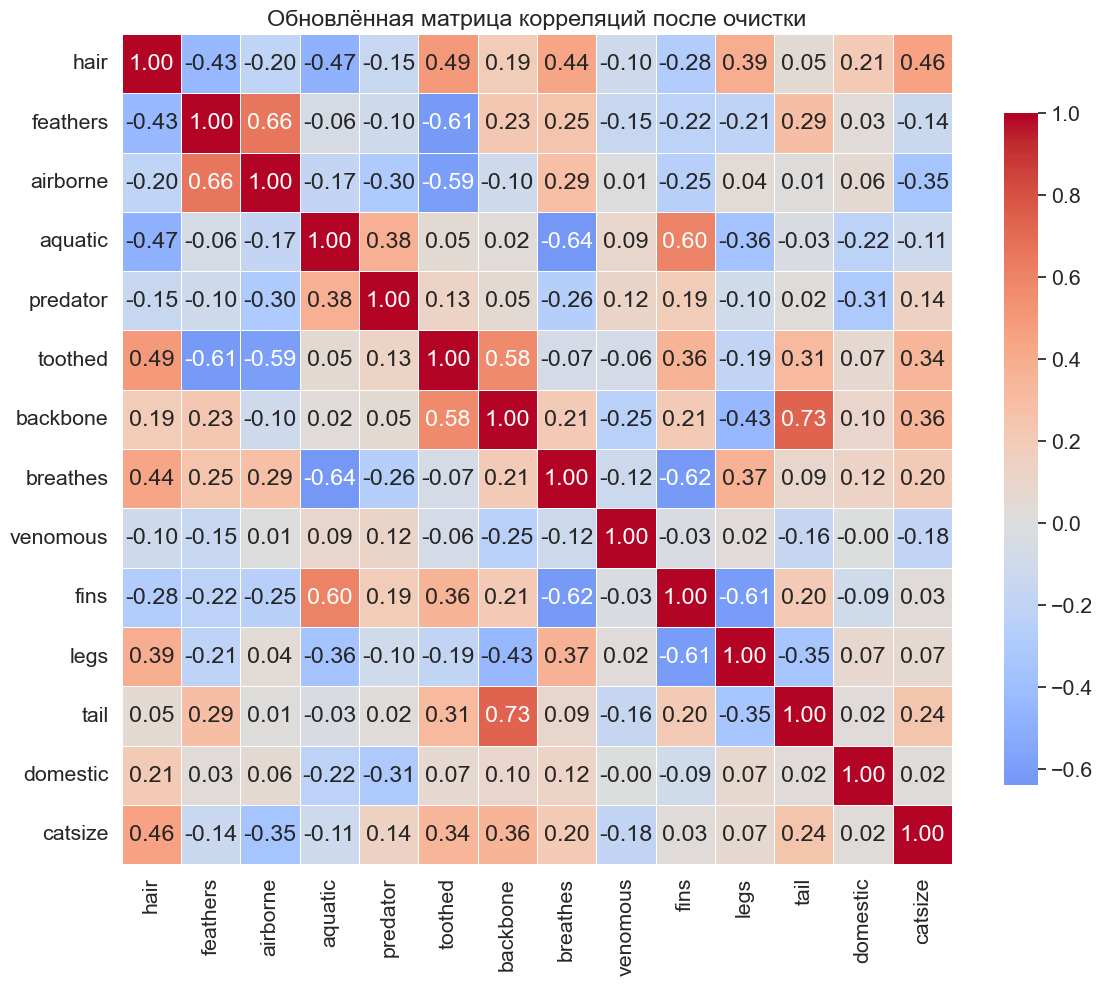

In [167]:
# === 12) –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–æ–≤–æ–π –º–∞—Ç—Ä–∏—Ü—ã ===
plt.figure(figsize=(12, 10))
sns.heatmap(corr_clean, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("–û–±–Ω–æ–≤–ª—ë–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏")
plt.tight_layout()
plt.show()